In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import os

import mne
from mne.io import read_raw_ctf
from mne.forward import make_forward_dipole
from mne.evoked import combine_evoked
from mne.simulation import simulate_evoked
from load_dataset import *

In [31]:
evoked_array = get_evoked("AdaBoost", window_size=0.2, test_size=0.33, random_state=0)

Start loading data...
From dataset: anonepi_02.ds
ds directory : /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_02.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
       0.31   79.57   -0.00 mm <->    0.31   79.57    0.00 mm (orig :  -47.56   66.09 -265.98 mm) diff =    0.000 mm
      -0.31  -79.57   -0.00 mm <->   -0.31  -79.57    0.00 mm (orig :   56.93  -53.61 -274.89 mm) diff =    0.000 mm
     103.93   -0.00    0.00 mm <->  103.93   -0.00    0.00 mm (orig :   78.68   68.54 -232.42 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 21 EEG channels from channel info
    21 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_02.ds/anonepi_02.meg4: 
    System

In [32]:
len(evoked_array)

50

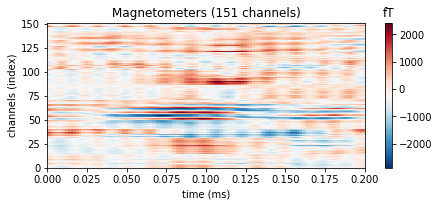

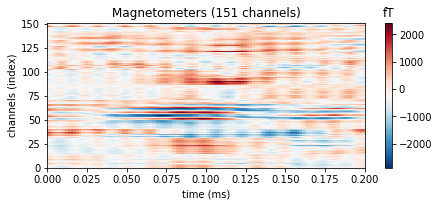

In [33]:
evoked_array[1].plot_image()

In [34]:
data = get_data_info()

ds directory : /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_02.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
       0.31   79.57   -0.00 mm <->    0.31   79.57    0.00 mm (orig :  -47.56   66.09 -265.98 mm) diff =    0.000 mm
      -0.31  -79.57   -0.00 mm <->   -0.31  -79.57    0.00 mm (orig :   56.93  -53.61 -274.89 mm) diff =    0.000 mm
     103.93   -0.00    0.00 mm <->  103.93   -0.00    0.00 mm (orig :   78.68   68.54 -232.42 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 21 EEG channels from channel info
    21 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/anonepi_02.ds/anonepi_02.meg4: 
    System clock channel is available, checking which sample

In [4]:
data.apply_gradient_compensation(0)

Compensator constructed to change 3 -> 0
Applying compensator to loaded data


<RawCTF  |  anonepi_02.meg4, n_channels x n_times : 206 x 72000 (120.0 sec), ~113.7 MB, data loaded>

In [35]:
def load_data(path):
    data_path=path
    data=mne.io.read_raw_ctf(data_path , preload=True)
    sampling_rate = data.info['sfreq']
    return data , sampling_rate

In [50]:
noise_path = 'MEG_Noise_20061102_01.ds'
file_path = os.path.join(os.getcwd(), '..', 'data/'+noise_path)
noise, sampling_rate = load_data(file_path)
channels = ['BG1-2511', 'BG2-2511', 'BG3-2511', 'BP1-2511', 'BP2-2511', 'BP3-2511', 'BQ1-2511', 'BQ2-2511', 'BQ3-2511', 'BR1-2511', 'BR2-2511', 'BR3-2511', 'G12-2511', 'G13-2511', 'G23-2511', 'P12-2511', 'P13-2511', 'Q12-2511', 'Q13-2511', 'Q21-2511', 'Q23-2511', 'R12-2511', 'R13-2511', 'R23-2511', 'SCLK01-177', 'G11-2511', 'G22-2511', 'P11-2511', 'P22-2511', 'Q11-2511', 'Q22-2511', 'R11-2511', 'R22-2511']
noise = noise.drop_channels(channels)
noise.resample(600, npad="auto")

ds directory : /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/MEG_Noise_20061102_01.ds
    res4 data read.
    hc data read.
    Separate EEG position data file read.
    Quaternion matching (desired vs. transformed):
       0.00   80.00    0.00 mm <->    0.00   80.00    0.00 mm (orig :  -56.57   56.57 -270.00 mm) diff =    0.000 mm
       0.00  -80.00    0.00 mm <->    0.00  -80.00    0.00 mm (orig :   56.57  -56.57 -270.00 mm) diff =    0.000 mm
      80.00    0.00    0.00 mm <->   80.00   -0.00    0.00 mm (orig :   56.57   56.57 -270.00 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /Users/mlion0200/GitRepo/bcni_epi/notebook/../data/MEG_Noise_20061102_01.ds/MEG_Noise_20061102_01.meg4: 
    System clock channel is available, checking which samples are valid.
    50 x 2048 = 102400 samples from 184 chs
Current compensa

<RawCTF  |  MEG_Noise_20061102_01.meg4, n_channels x n_times : 151 x 51200 (85.3 sec), ~59.4 MB, data loaded>

In [60]:
noise.info['ch_names']

['MLC11-2511',
 'MLC12-2511',
 'MLC13-2511',
 'MLC14-2511',
 'MLC15-2511',
 'MLC21-2511',
 'MLC22-2511',
 'MLC23-2511',
 'MLC24-2511',
 'MLC31-2511',
 'MLC32-2511',
 'MLC33-2511',
 'MLC41-2511',
 'MLC42-2511',
 'MLC43-2511',
 'MLF11-2511',
 'MLF12-2511',
 'MLF21-2511',
 'MLF22-2511',
 'MLF23-2511',
 'MLF31-2511',
 'MLF32-2511',
 'MLF33-2511',
 'MLF34-2511',
 'MLF41-2511',
 'MLF42-2511',
 'MLF43-2511',
 'MLF44-2511',
 'MLF45-2511',
 'MLF51-2511',
 'MLF52-2511',
 'MLO11-2511',
 'MLO12-2511',
 'MLO21-2511',
 'MLO22-2511',
 'MLO31-2511',
 'MLO32-2511',
 'MLO33-2511',
 'MLO41-2511',
 'MLO42-2511',
 'MLO43-2511',
 'MLP11-2511',
 'MLP12-2511',
 'MLP13-2511',
 'MLP21-2511',
 'MLP22-2511',
 'MLP31-2511',
 'MLP32-2511',
 'MLP33-2511',
 'MLP34-2511',
 'MLT11-2511',
 'MLT12-2511',
 'MLT13-2511',
 'MLT14-2511',
 'MLT15-2511',
 'MLT16-2511',
 'MLT21-2511',
 'MLT22-2511',
 'MLT23-2511',
 'MLT24-2511',
 'MLT25-2511',
 'MLT26-2511',
 'MLT31-2511',
 'MLT32-2511',
 'MLT33-2511',
 'MLT34-2511',
 'MLT35-25

In [51]:
cov = mne.compute_raw_covariance(noise)

Using up to 426 segments
Number of samples used : 51120
[done]


In [52]:
len(cov['data'])

151

In [59]:
len(evoked_array[1].info['ch_names'])

151

    The projection vectors do not apply to these channels.


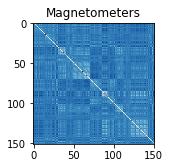

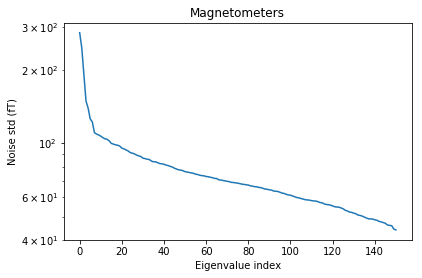

(<Figure size 180x194.4 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

In [54]:
cov.plot(noise.info, proj=True)

In [55]:
sphere = mne.make_sphere_model(r0=(0.53, 0.14, 4.29), head_radius=9.61)


Equiv. model fitting -> RV = 0.643062 %
mu1 = 0.951229    lambda1 = 0.118068
mu2 = 0.751847    lambda2 = 0.168196
mu3 = 0.65445    lambda3 = 0.524105
Set up EEG sphere model with scalp radius  9610.0 mm



In [57]:
dip = mne.fit_dipole(evoked_array[1], cov=cov, bem=sphere)[0]

BEM               : <ConductorModel  |  Sphere (3 layers): r0=[530.0, 140.0, 4290.0] R=9610 mm>
Sphere model      : origin at ( 530.00  140.00  4290.00) mm, rad =    8.6 mm
Guess grid        :   20.0 mm
Guess mindist     :    5.0 mm
Guess exclude     :   20.0 mm
Using standard MEG coil definitions.

Coordinate transformation: head -> MRI (surface RAS)
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00
Coordinate transformation: MEG device -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
     0.000000  0.000000  1.000000       0.00 mm
     0.000000  0.000000  0.000000       1.00
0 bad channels total
Read 151 MEG channels from info
81 coil definitions read
Coordinate transformation: MEG device -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.000000  0.000000       0.00 mm
  

RuntimeError: Not all channels present in noise covariance:
['59', '100', '94', '40', '29', '114', '112', '66', '56', '110', '8', '126', '28', '69', '115', '65', '36', '132', '52', '37', '62', '90', '16', '103', '75', '14', '15', '96', '99', '76', '64', '101', '143', '134', '137', '113', '127', '39', '131', '72', '74', '41', '97', '139', '67', '35', '81', '119', '45', '47', '5', '9', '53', '120', '46', '19', '124', '11', '84', '3', '32', '123', '78', '88', '122', '26', '31', '57', '24', '150', '49', '85', '86', '17', '98', '95', '108', '140', '38', '102', '20', '42', '80', '133', '51', '54', '50', '89', '118', '23', '104', '142', '93', '6', '25', '129', '18', '107', '61', '30', '68', '4', '148', '141', '44', '33', '92', '138', '55', '58', '77', '0', '87', '125', '136', '27', '34', '22', '117', '1', '147', '71', '63', '2', '111', '149', '83', '144', '82', '7', '12', '48', '91', '105', '135', '60', '79', '21', '116', '13', '121', '130', '70', '109', '128', '10', '73', '146', '106', '145', '43']